Clayton Cohn<br>
May 6, 2020<br>
DSC 478<br>
Prof. Mobasher

# Assignment 3

In [1]:
import pandas as pd

DATA_PATH = "/Users/claytoncohn/Dropbox/New/DePaul/DSC478/data/communities/communities.csv"

__1. Linear Regression [Dataset: communities.zip] For this problem you will experiment with multiple linear regression models to make predictions with numerical data.__

You will also explore more systematic methods for feature selection and for optimizing model parameters (model selection). 

The data set you will use is a subset of the "Communities and Crime" data set that combines information from the 1990 census data as well as FBI crime data from 1995. 

Please read the full description of the data, including the description and statistics on different variables. 

__The target attribute for regression purposes is "ViolentCrimesPerPop".__ 

__The two identifier attributes "state" and "community name" should be excluded for the regression task.__

Your tasks in this problem are the following [Note: for these tasks you will use the available linear-models from scikit-learn as well as the implementations of the relevant approaches from the Ch. 8 of MLA] .

a. Load and preprocess the data using Pandas or Numpy and, if necessary, preprocessing functions from scikit-learn.

    The provided data is already normalized (see description), so there is no need for additional normalization. 
        
    Separate the target attribute for regression. 

In [2]:
import numpy as np

df = pd.read_csv(DATA_PATH, header=0)
df = df.drop(columns=['state', 'communityname'])

df = df.replace({'?': np.nan})
df = df.dropna()
df = df.astype(np.float)

df.head(10)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03
5,0.02,0.28,0.06,0.54,1.00,0.25,0.31,0.48,0.27,0.37,...,0.0,0.70,0.42,0.49,0.73,0.64,0.01,0.58,0.10,0.14
6,0.01,0.39,0.00,0.98,0.06,0.02,0.30,0.37,0.23,0.60,...,0.0,0.15,0.81,0.77,0.91,0.84,0.05,0.08,0.06,0.03
7,0.01,0.74,0.03,0.46,0.20,1.00,0.52,0.55,0.36,0.35,...,0.0,0.59,0.58,0.52,0.79,0.78,0.01,0.33,0.00,0.55
8,0.03,0.34,0.20,0.84,0.02,0.00,0.38,0.45,0.28,0.48,...,0.0,0.01,0.78,0.48,0.79,0.75,0.04,0.17,0.04,0.53
9,0.01,0.40,0.06,0.87,0.30,0.03,0.90,0.82,0.80,0.39,...,0.0,0.22,0.42,0.34,0.23,0.09,0.00,0.47,0.11,0.15


In [3]:
X = df.drop(columns=["ViolentCrimesPerPop"])

X.head(30)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.04,0.00,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.00,0.00,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.00,0.00,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.00,0.00,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.00,0.00,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02
5,0.02,0.28,0.06,0.54,1.00,0.25,0.31,0.48,0.27,0.37,...,0.00,0.00,0.70,0.42,0.49,0.73,0.64,0.01,0.58,0.10
6,0.01,0.39,0.00,0.98,0.06,0.02,0.30,0.37,0.23,0.60,...,0.00,0.00,0.15,0.81,0.77,0.91,0.84,0.05,0.08,0.06
7,0.01,0.74,0.03,0.46,0.20,1.00,0.52,0.55,0.36,0.35,...,0.00,0.00,0.59,0.58,0.52,0.79,0.78,0.01,0.33,0.00
8,0.03,0.34,0.20,0.84,0.02,0.00,0.38,0.45,0.28,0.48,...,0.01,0.00,0.01,0.78,0.48,0.79,0.75,0.04,0.17,0.04
9,0.01,0.40,0.06,0.87,0.30,0.03,0.90,0.82,0.80,0.39,...,0.00,0.00,0.22,0.42,0.34,0.23,0.09,0.00,0.47,0.11


In [4]:
y = df["ViolentCrimesPerPop"]
y.head(10)

0    0.20
1    0.67
2    0.43
3    0.12
4    0.03
5    0.14
6    0.03
7    0.55
8    0.53
9    0.15
Name: ViolentCrimesPerPop, dtype: float64

Compute and display basic statistics (mean, standard deviation, min, max, etc.) for each of the variables in the data set. 

In [5]:
X.describe()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans
count,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,...,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000
mean,0.057612,0.463437,0.179227,0.753984,0.153753,0.144089,0.424210,0.493914,0.336297,0.423086,...,0.029453,0.022790,0.215655,0.608776,0.534967,0.626322,0.651470,0.065243,0.232910,0.161741
std,0.126935,0.163747,0.252870,0.243807,0.208905,0.232531,0.155234,0.143584,0.166540,0.179196,...,0.102630,0.100424,0.231146,0.204314,0.181360,0.200520,0.198253,0.109485,0.203127,0.229099
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,0.250000,0.300000,...,0.000000,0.000000,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000
50%,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,0.290000,0.420000,...,0.000000,0.000000,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000
75%,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,0.360000,0.530000,...,0.010000,0.000000,0.280000,0.770000,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Create a 20%-80% randomized split of the data. Set aside the 20% test portion; the 80% training data partition will be used for cross-validation on various tasks specified below.

In [6]:
from sklearn.model_selection import train_test_split

SEED = 33

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
X_train.head(10)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans
1185,0.05,0.53,0.31,0.69,0.14,0.32,0.37,0.46,0.26,0.30,...,0.00,0.00,0.60,0.25,0.45,0.41,0.51,0.08,0.11,0.05
402,0.00,0.45,0.41,0.65,0.09,0.02,0.56,0.60,0.46,0.45,...,0.00,0.00,0.06,0.78,0.50,0.66,0.80,0.02,0.15,0.06
1758,0.00,0.51,0.02,0.97,0.05,0.00,0.68,0.51,0.53,0.61,...,0.01,0.00,0.05,0.95,0.74,0.72,0.89,0.05,0.05,0.05
1391,0.00,0.39,0.00,1.00,0.00,0.01,0.33,0.46,0.26,0.49,...,0.00,0.00,0.01,0.90,0.70,0.78,0.83,0.02,0.10,0.03
1067,0.00,0.54,0.04,0.69,0.09,0.49,0.30,0.43,0.21,0.31,...,0.00,0.00,0.34,0.44,0.18,0.40,0.56,0.07,0.04,0.05
759,0.03,0.43,0.03,0.96,0.06,0.04,0.41,0.40,0.22,0.31,...,0.00,0.00,0.05,0.54,0.57,0.62,0.51,0.06,0.11,0.03
587,0.00,0.90,0.00,0.70,0.00,1.00,0.68,0.59,0.42,0.40,...,0.00,0.00,0.54,0.71,0.83,0.89,0.84,0.02,0.14,0.00
574,0.02,0.33,0.03,0.95,0.10,0.03,0.29,0.41,0.26,0.56,...,0.00,0.00,0.13,0.86,0.67,0.71,0.74,0.03,0.15,0.05
56,0.16,0.44,0.05,0.76,0.53,0.21,0.37,0.49,0.30,0.29,...,0.03,0.01,0.42,0.49,0.42,0.54,0.62,0.08,0.32,0.56
428,0.03,0.48,0.02,0.78,0.02,0.65,0.42,0.43,0.28,0.58,...,0.01,0.03,0.14,0.79,0.59,0.60,0.86,0.07,0.09,0.00


b. Perform standard linear regression on data using the closed form solution implementation (not the scikit-learn implementation). 

In [7]:
# Code taken from the notebook provided by Prof. Mobasher: Regression-scikit-learn.ipynb
def standRegres(xArr,yArr):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    xTx = xMat.T*xMat
    if np.linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T*yMat)
    return ws

In [8]:
w = standRegres(X_train,y_train)
w

matrix([[-1.38909680e-01],
        [ 1.52065556e-02],
        [ 2.55146288e-01],
        [ 4.33587096e-02],
        [ 2.15039994e-02],
        [ 1.38280986e-01],
        [ 2.37443432e-01],
        [-1.77006458e-01],
        [-2.54501570e-01],
        [ 2.08584865e-01],
        [ 7.46521718e-02],
        [ 4.28868092e-02],
        [-1.16947643e-01],
        [-2.31987251e-01],
        [ 3.24884365e-02],
        [-1.46418135e-01],
        [-3.10215707e-02],
        [ 4.07432401e-02],
        [-5.84488500e-02],
        [ 1.23723326e-01],
        [ 1.56404275e-02],
        [-1.18959362e-01],
        [-1.98090919e-02],
        [-2.98909900e-02],
        [ 1.77596383e-02],
        [ 2.63477970e-02],
        [ 3.87633512e-02],
        [ 1.21754141e-01],
        [-1.59559010e-01],
        [-1.15053159e-01],
        [ 8.31098354e-02],
        [ 1.12114873e-01],
        [ 4.74539304e-02],
        [ 3.22488842e-01],
        [-1.85062618e-02],
        [-1.12963477e-02],
        [ 4.24107834e-01],
 

Compute the RMSE value on the full training data (the 80% partition). 

In [9]:
# Now that we have the regression coefficients, we can compute the predictions:
xMat=np.mat(X_train)
yMat=np.mat(y_train)
yHat = xMat*w

# You can "ravel" the 2d matrix above to get a 1d Numpy array more suitable for using in earlier functions.
yHat = yHat.A.ravel()
yHat[:10]

array([ 0.33279085,  0.26248924,  0.0032709 , -0.05511177,  0.25629534,
        0.09828429,  0.34646183,  0.06153047,  0.21974285,  0.15663689])

In [10]:
# Now we can constuct an array of errors
err = abs(yHat - y_train)

# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(err,err)

In [11]:
# Finally compute RMSE
rmse_train = np.sqrt(total_error/len(yHat))
print("RMSE on Training Data: ", rmse_train)

RMSE on Training Data:  0.12773957154846552


Also, plot the correlation between the predicted and actual values of the target attribute. 

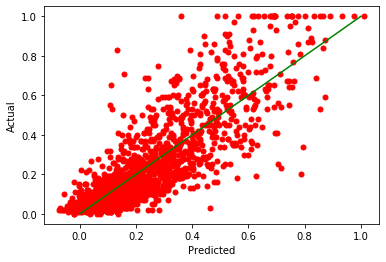

In [12]:
# Plot predicted against actual (in the training data)
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(yHat, y_train,'ro', markersize=5)
plt.plot([0,1],[0,1], 'g-')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Display the obtained regression coefficients (weights) and plot them using matplotlib.

In [13]:
for i in range(len(X_train.columns)):
    print("%7s   %2.2f" % (X_train.columns[i], w[i]))

population   -0.14
householdsize   0.02
racepctblack   0.26
racePctWhite   0.04
racePctAsian   0.02
racePctHisp   0.14
agePct12t21   0.24
agePct12t29   -0.18
agePct16t24   -0.25
agePct65up   0.21
numbUrban   0.07
pctUrban   0.04
medIncome   -0.12
pctWWage   -0.23
pctWFarmSelf   0.03
pctWInvInc   -0.15
pctWSocSec   -0.03
pctWPubAsst   0.04
pctWRetire   -0.06
medFamInc   0.12
perCapInc   0.02
whitePerCap   -0.12
blackPerCap   -0.02
indianPerCap   -0.03
AsianPerCap   0.02
OtherPerCap   0.03
HispPerCap   0.04
NumUnderPov   0.12
PctPopUnderPov   -0.16
PctLess9thGrade   -0.12
PctNotHSGrad   0.08
PctBSorMore   0.11
PctUnemployed   0.05
PctEmploy   0.32
PctEmplManu   -0.02
PctEmplProfServ   -0.01
MalePctDivorce   0.42
MalePctNevMarr   0.27
FemalePctDiv   0.03
TotalPctDiv   -0.33
PersPerFam   -0.08
PctFam2Par   0.08
PctKids2Par   -0.26
PctYoungKids2Par   -0.02
PctTeen2Par   -0.01
PctWorkMomYoungKids   0.07
PctWorkMom   -0.19
NumIlleg   -0.21
PctIlleg   0.17
NumImmig   -0.09
PctImmigRecent   0.0

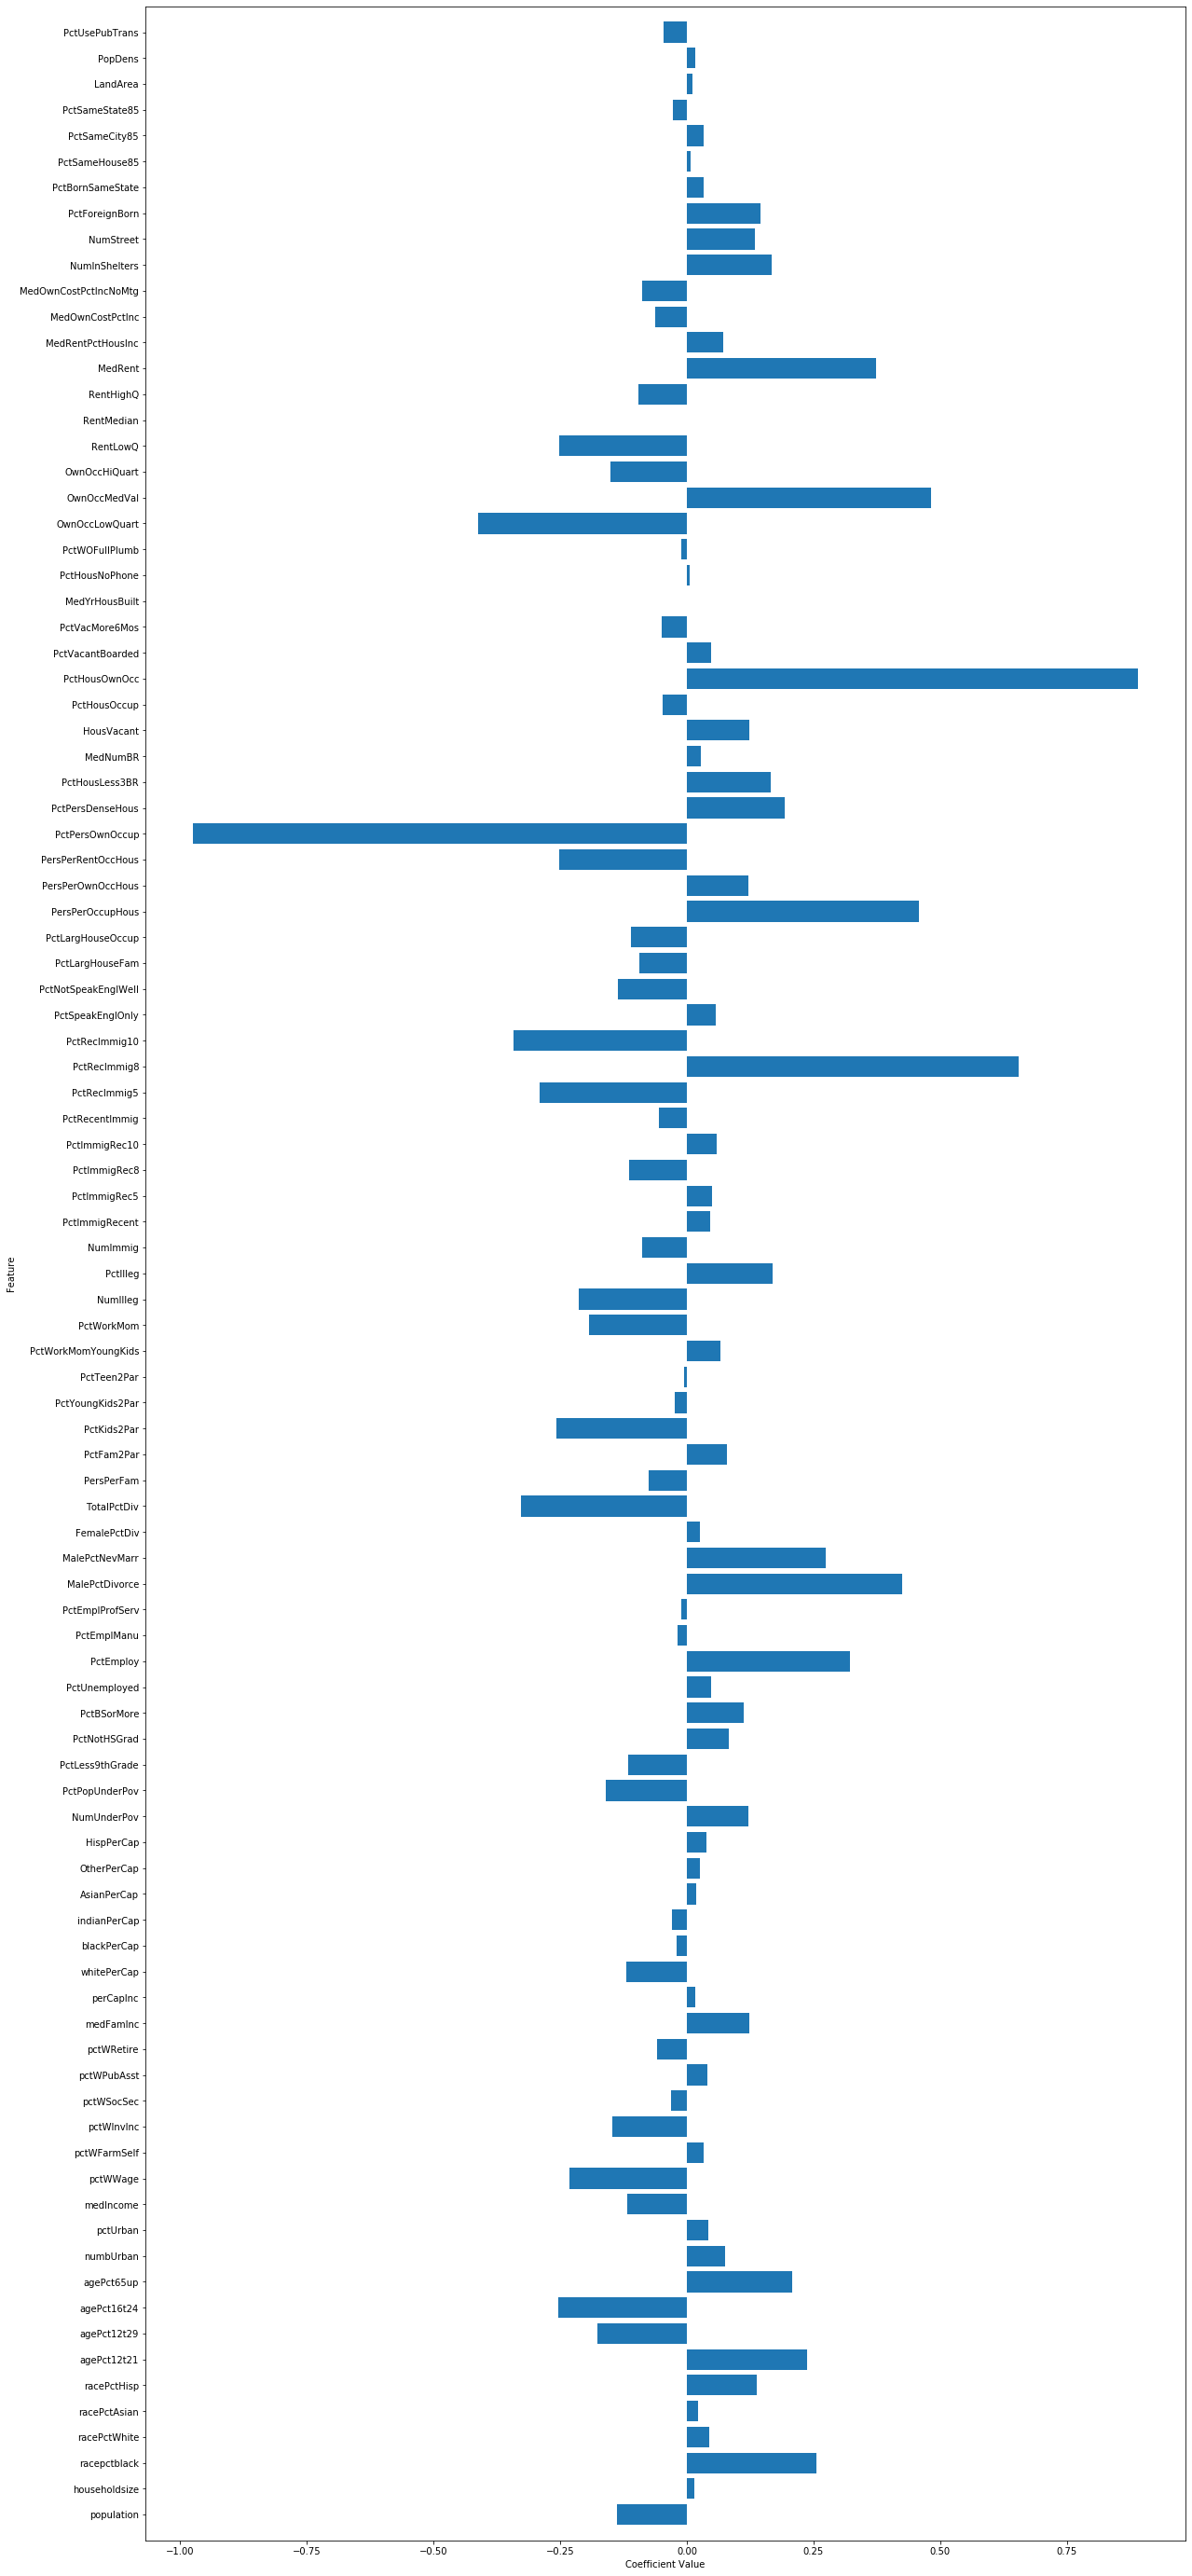

In [14]:
w_flat = w.A.ravel()

def plot_coefficients(weights, n_features, feature_names):
    plt.rcParams["figure.figsize"] = (20,50)
    plt.barh(range(n_features), weights, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Coefficient Value")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.show()
    
plot_coefficients(w_flat, len(X_train.columns), X_train.columns)

Finally, perform 10-fold cross-validation and compare the cross-validation RMSE to the training RMSE (for cross validation, you should use the KFold module from sklearn.model_selection).

In [15]:
from sklearn.model_selection import KFold

n = 10

kf = KFold(n_splits=n, random_state=22, shuffle=True)
xval_err = 0
f = 1
for train, test in kf.split(X_train):
    X_fold_train = X_train[X_train.index.isin(train)]
    y_fold_train= y_train[y_train.index.isin(train)]

    w = standRegres(X_fold_train,y_fold_train)

    xMat=np.mat(X_fold_train)
    yMat=np.mat(y_fold_train)
    yHat = xMat*w
    yHat = yHat.A.ravel()
    
    err = abs(yHat - y_fold_train)
    total_error = np.dot(err,err)
    
    rmse = np.sqrt(np.dot(err,err)/len(X_fold_train))
    print("Fold %2d RMSE: %.4f" % (f, rmse))
    xval_err += rmse
    f += 1
print("\nRMSE on Training Data w/ cross-validation:",xval_err/n)

Fold  1 RMSE: 0.1240
Fold  2 RMSE: 0.1240
Fold  3 RMSE: 0.1275
Fold  4 RMSE: 0.1270
Fold  5 RMSE: 0.1271
Fold  6 RMSE: 0.1230
Fold  7 RMSE: 0.1272
Fold  8 RMSE: 0.1248
Fold  9 RMSE: 0.1250
Fold 10 RMSE: 0.1268

RMSE on Training Data w/ cross-validation: 0.12563754862985696


c. Feature Selection:  use the scikit-learn regression model from sklearn.linear_model with a subset of features to perform linear regression.

For feature selection, write a script or function that takes as input the training data, target variable; the model; and any other parameters you find necessary, and returns the optimal percentage of the most informative features to use. 

Your approach should use k-fold cross-validation on the training data (you can use k=5). You can use feature_selection.SelectPercentile to find the most informative variables. 

Since this is regression not classification, you should use feature_selection.f_regression as scoring function rather than chi2). 

In [16]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn import feature_selection
from sklearn.model_selection import cross_val_score, cross_validate

linreg = LinearRegression()

percentiles = range(5, 101, 5)
results = []

for i in percentiles:
    fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
    X_train_fs = fs.fit_transform(X_train, y_train)
    scores = cross_val_score(linreg, X_train_fs, y_train, cv=5)
    print("%2d  %0.4f" % (i, scores.mean()))
    results = np.append(results, scores.mean())

 5  0.5933
10  0.5993
15  0.6034
20  0.6151
25  0.6280
30  0.6329
35  0.6359
40  0.6386
45  0.6348
50  0.6327
55  0.6335
60  0.6334
65  0.6309
70  0.6299
75  0.6306
80  0.6323
85  0.6344
90  0.6322
95  0.6387
100  0.6400


In [17]:
optimal_percentile_ind = np.where(results == results.max())[0][0]
print(optimal_percentile_ind)

19


Optimal percentile of features:100 

Optimal number of features:97 



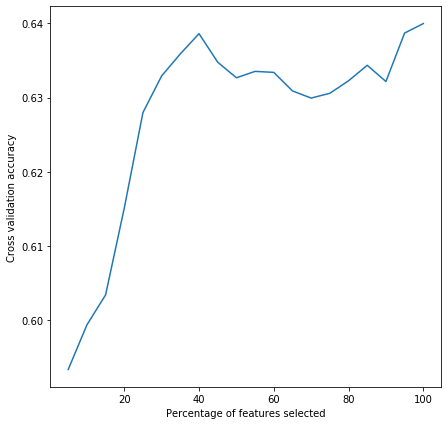

In [18]:
optimal_percentile_ind = np.where(results == results.max())[0][0]
print("Optimal percentile of features:{0}".format(percentiles[optimal_percentile_ind]), "\n")
optimal_num_features = int(percentiles[optimal_percentile_ind]*len(X.columns)/100)
print("Optimal number of features:{0}".format(optimal_num_features), "\n")

# Plot percentile of features VS. cross-validation scores
import pylab as pl
pl.rcParams["figure.figsize"] = (7,7)
pl.figure()
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles,results)

Show the list of most informative variables and their weights. 

In [19]:
feats_scores = []

for i in range(len(X.columns.values)):
    if fs.get_support()[i]:
        t = (X.columns.values[i],fs.scores_[i])
        feats_scores.append(t)
        
feats_scores.sort(key=lambda x:x[1], reverse=True)

In [20]:
for i in range(len(feats_scores)):
    print("{0}\t\t{1}\t\t{2}".format(i+1,feats_scores[i][0],feats_scores[i][1]))

1		PctKids2Par		1901.3001500117578
2		PctIlleg		1856.8497011201507
3		PctFam2Par		1596.8391699130275
4		racePctWhite		1304.8806138267378
5		PctYoungKids2Par		1269.9824661860125
6		PctTeen2Par		1231.3207931534755
7		racepctblack		992.1643850847865
8		pctWPubAsst		783.2243592146142
9		pctWInvInc		761.0568397801853
10		FemalePctDiv		693.8626992089322
11		TotalPctDiv		677.2286585312019
12		PctPersOwnOccup		600.0985735146996
13		MalePctDivorce		580.3420144382258
14		PctPopUnderPov		569.4858535418589
15		PctUnemployed		532.3616336751946
16		PctVacantBoarded		489.3011943349653
17		PctHousNoPhone		485.8420818038609
18		PctNotHSGrad		461.05779209245986
19		PctHousOwnOcc		448.7587141384104
20		PctHousLess3BR		446.47828959213444
21		NumIlleg		399.8278427791821
22		medFamInc		374.4346957111078
23		NumUnderPov		361.95940233900876
24		PctPersDenseHous		348.80809055762427
25		medIncome		341.3095735160517
26		HousVacant		314.7249171324931
27		PctLess9thGrade		296.0320417055489
28		NumInShelters		246.1

Next, plot the model's mean absolute error values  on cross-validation using only the selected features (See scikit-learn's metrics.neg_mean_absolute_error).

In order to use cross_val_score with regression you'll need to pass to it scoring='mean_absolute_error' as a parameter. 

[Hint: for an example of a similar feature selection process please review the class example notebook (though note that the task in this example was classification not regression). Also, review scikit-learn documentation for feature selection.] 

In [21]:
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=optimal_percentile_ind)
X_train_fs = fs.fit_transform(X_train, y_train)
scores = cross_val_score(linreg, X_train_fs, y_train, cv=5, scoring='neg_mean_absolute_error')
scores = [abs(i) for i in scores]
print("Scores",scores)
print("Cross-val mean:",np.mean(scores))

Scores [0.10340535122287983, 0.097966515063423, 0.09789354680695213, 0.0986222353673524, 0.10722619499765583]
Cross-val mean: 0.10102276869165264


As a final step, train your model on the full 80% training data and evaluate it using the set-aside 20% test partition.

In [22]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
# First, let's compute errors on all testing instances
p = linreg.predict(X_test)

# Now we can constuct an array of errors
err = abs(p-y_test)

# Let's see the error on the first 10 predictions
print(err[:10])

1159    0.199120
1080    0.107321
1634    0.026302
1700    0.237067
1956    0.073282
1808    0.222419
137     0.141683
46      0.014871
1989    0.049865
4       0.047577
Name: ViolentCrimesPerPop, dtype: float64


In [24]:
# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(err,err)

# Finally compute RMSE
rmse_test = np.sqrt(total_error/len(p))
print("RMSE on Testing Data: ", rmse_test)

RMSE on Testing Data:  0.13710537091581151


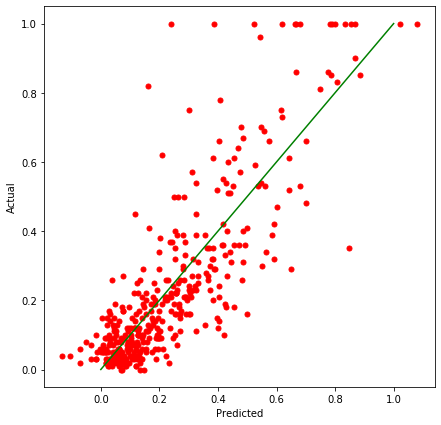

In [25]:
pl.plot(p, y_test,'ro', markersize=5)
pl.plot([0,1],[0,1], 'g-')
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.show()

d. Next, perform Ridge Regression and Lasso Regression using the modules from sklearn.linear_model. 

In each case, perform systematic model selection to identify the optimal alpha parameter. 

You should create a function that takes as input the data and target variable; the parameter to vary and a list of its values; the model to be trained; and any other relevant input needed to determine the optimal value for the specified parameter. 

The model selection process should perform k-fold cross validation (k should be a parameter, but you can select k=5 for this problem). 

For each model, you should also plot the error values on the training and cross-validation splits across the specified values of the alpha parameter. 

Finally, using the best alpha values, train the model on the full training data and evaluate it on the set-aside test data. 

Discuss your observation and conclusions. 

[Hint: for an example of a similar model selection process please review the class example notebook.]

In [26]:
def calc_params(X, y, clf, param_values, param_name, K):
    
    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)

    # initialize training and testing score arrays with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):
        
        # set classifier parameters
        clf.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(n_splits=K, shuffle=True, random_state=0)
        
        # iterate over the K folds
        j = 0
        for train, test in cv.split(X):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            clf.fit(X[train], y[train])
            k_train_scores[j] = clf.score(X[train], y[train])
            k_test_scores[j] = clf.score(X[test], y[test])
            j += 1
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
        print('{} = {}, train score: {}'.format(param_name,param_value,train_scores[i]))

    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation accuracy")

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

alpha = 0.01, train score: 0.6963717809913756
alpha = 0.41795918367346935, train score: 0.6921961080871851
alpha = 0.8259183673469387, train score: 0.6894039092160363
alpha = 1.233877551020408, train score: 0.6871659055882334
alpha = 1.6418367346938774, train score: 0.6852879420369938
alpha = 2.0497959183673466, train score: 0.6836681055593088
alpha = 2.457755102040816, train score: 0.6822431533858871
alpha = 2.865714285714285, train score: 0.6809707390199391
alpha = 3.2736734693877545, train score: 0.6798210413256655
alpha = 3.681632653061224, train score: 0.6787722423681462
alpha = 4.0895918367346935, train score: 0.677807885079549
alpha = 4.497551020408163, train score: 0.6769152408865073
alpha = 4.905510204081632, train score: 0.6760842561760333
alpha = 5.313469387755101, train score: 0.6753068473814802
alpha = 5.721428571428571, train score: 0.6745764147176482
alpha = 6.12938775510204, train score: 0.6738874978255774
alpha = 6.537346938775509, train score: 0.6732355262789573
alpha

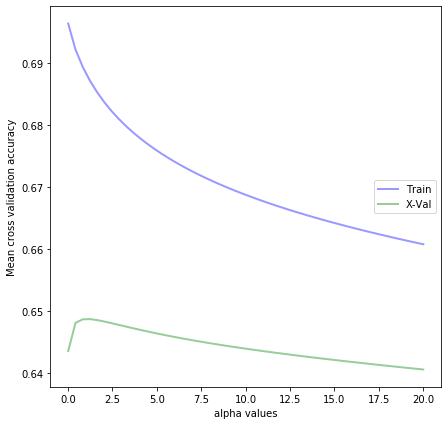

In [27]:
# First ridge

alpha = np.linspace(.01,20,50)
ridge = Ridge(alpha=alpha)

train_scores, test_scores = calc_params(X_train, y_train, ridge, alpha, 'alpha', 5)

In [28]:
np.argmax(train_scores)

0

In [29]:
np.argmax(test_scores)

3

In [30]:
# Create linear regression object with best ridge coefficient
ridge = Ridge(alpha=alpha[2])

# Train the model using the training set
ridge.fit(X_train,y_train)

Ridge(alpha=0.8259183673469387, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [31]:
# Compute RMSE on testing data
p = ridge.predict(X_test)
err = p-y_test
total_error = np.dot(err,err)
rmse_test = np.sqrt(total_error/len(p))

print('RMSE on testing:',rmse_test)

RMSE on testing: 0.13626861621301478


A RMSE of 0.13 is comparable to, but not quite as good as, linear regression.

alpha = 0.0001, train score: 0.6865429330425068
alpha = 0.0009142857142857143, train score: 0.6575210966068837
alpha = 0.0017285714285714285, train score: 0.6463851941913228
alpha = 0.0025428571428571423, train score: 0.6373482994703696
alpha = 0.0033571428571428567, train score: 0.6283823509995646
alpha = 0.004171428571428572, train score: 0.6189776804831746
alpha = 0.004985714285714285, train score: 0.6087253362858884
alpha = 0.0058, train score: 0.5992129394580459
alpha = 0.006614285714285714, train score: 0.5903031904632707
alpha = 0.0074285714285714285, train score: 0.5820836595569603
alpha = 0.008242857142857142, train score: 0.5739670989881993
alpha = 0.009057142857142856, train score: 0.5652970701461688
alpha = 0.00987142857142857, train score: 0.5564053717469697
alpha = 0.010685714285714284, train score: 0.5475210224417036
alpha = 0.011499999999999998, train score: 0.5388862545119688
alpha = 0.012314285714285713, train score: 0.5296178916900267
alpha = 0.013128571428571427, tr

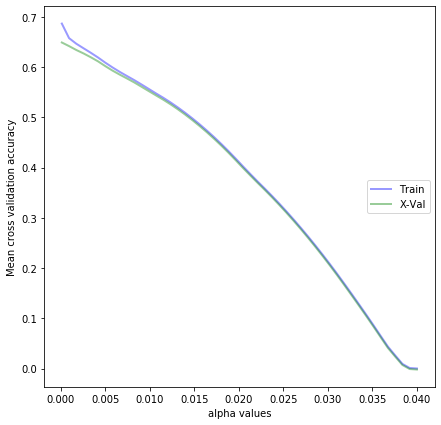

In [32]:
# Now lasso
alpha = np.linspace(.0001,.04,50)
lasso = Lasso(alpha=alpha)

train_scores, test_scores = calc_params(X_train, y_train, lasso, alpha, 'alpha', 5)

In [33]:
np.argmax(train_scores)

0

In [34]:
np.argmax(test_scores)

0

In [35]:
# Create linear regression object with best ridge coefficient
lasso = Lasso(alpha=test_scores[0])

# Train the model using the training set
lasso.fit(X_train,y_train)

Lasso(alpha=0.6488970957539413, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [36]:
# Compute RMSE on testing data
p = lasso.predict(X_test)
err = p-y_test
total_error = np.dot(err,err)
rmse_test = np.sqrt(total_error/len(p))

print('RMSE on testing:',rmse_test)

RMSE on testing: 0.2456818133605803


A RMSE of 0.25 is twice as bad as linear regression and ridge regression. So in this instance, we would not be choosing lasso regression, as both Linear Regression and Ridge Regression do a better job of minimizing the RMSE on our data.

e. Next, perform regression using Stochastic Gradient Descent for regression. 

For this part, you should use the SGDRegessor module from sklearn.linear_model. 

Note that SGDRegessor requires that features be standardized (with 0 mean and scaled by standard deviation). Prior to fiting the model, perform the scaling using StandardScaler from sklearn.preprocessing. 

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_sgd = scaler.transform(X_train)

For this problem, perform a grid search (using GridSearchCV from sklearn.grid_search) 

Your grid search should compare combinations of two penalty parameters ('l2', 'l1') and different values of alpha (alpha could vary from 0.0001 which is the default to relatively large values, say 10). 

In [38]:
from sklearn.model_selection import GridSearchCV

sgdreg = SGDRegressor()

parameters = {
    'penalty': ['l2','l1'],
    'alpha': np.linspace(.0001, 1, 100),
}

grid_search = GridSearchCV(sgdreg, parameters, verbose=1, cv=5)

In [39]:
grid_search.fit(X_train_sgd, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   12.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=None,
                                    shuffle=True, tol=0.001,
                                    validation_fraction=0.1, verbose=0,
                                    warm_star...
       7.273e-01, 7.374e-01, 7.475e-01, 7.576e-01, 7.677e-01, 7.778e-01,
       7.879e-01, 7.980e-01, 8.081e-01, 8.182e-01, 8.283e-01, 8.384e-01,
       8.485e-01, 8.586e-01, 8.687e-01, 8.788e-01, 8.889e-01, 8.990e-01,
       9.091e-01, 9.192e-01, 9.293e-01, 9.394e-01, 9.495e-01, 9.596e-0

Using the best parameters, apply the model to the set-aside test data. 

In [40]:
best_params = grid_search.best_params_
best_params, grid_search.best_score_

({'alpha': 0.0001, 'penalty': 'l1'}, 0.6415163289454588)

In [41]:
sgdreg = SGDRegressor(penalty=best_params["penalty"], alpha=best_params["alpha"])
sgdreg.fit(X_train_sgd,y_train)

scaler.fit(X_test)
X_test_sgd = scaler.transform(X_test)

# Compute RMSE on testing data
p = sgdreg.predict(X_test_sgd)
err = p-y_test
total_error = np.dot(err,err)
rmse_test = np.sqrt(total_error/len(p))
print("SGD RMSE mean test:",np.mean(rmse_test))

SGD RMSE mean test: 0.14148688017300556


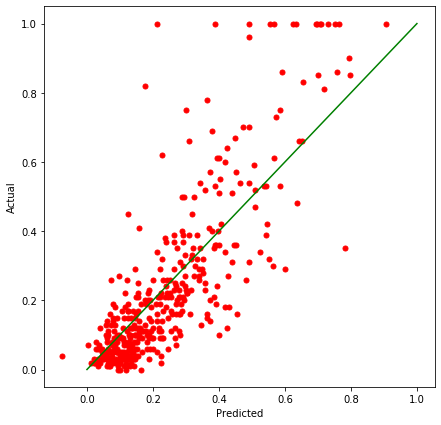

In [42]:
pl.plot(p, y_test,'ro', markersize=5)
pl.plot([0,1],[0,1], 'g-')
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.show()

Finally, perform model selection (similar to part d, above) to find the best "l1_ratio" parameter using SGDRegressor with  the "elasticnet" penalty parameter.

[Note: "l1_ratio" is The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1;  l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1 penalty; defaults to 0.15.] 

l1_ratio = 0.0, train score: 0.6704949206153221
l1_ratio = 0.010101010101010102, train score: 0.6528578283351169
l1_ratio = 0.020202020202020204, train score: 0.6710802439170663
l1_ratio = 0.030303030303030304, train score: 0.6670299480330522
l1_ratio = 0.04040404040404041, train score: 0.6661651585094484
l1_ratio = 0.05050505050505051, train score: 0.6706868857322533
l1_ratio = 0.06060606060606061, train score: 0.6672947651779604
l1_ratio = 0.07070707070707072, train score: 0.6679775018947115
l1_ratio = 0.08080808080808081, train score: 0.6639444514898167
l1_ratio = 0.09090909090909091, train score: 0.6716964232064628
l1_ratio = 0.10101010101010102, train score: 0.6709826115439239
l1_ratio = 0.11111111111111112, train score: 0.6670928044284963
l1_ratio = 0.12121212121212122, train score: 0.673841810230225
l1_ratio = 0.13131313131313133, train score: 0.6662191843561006
l1_ratio = 0.14141414141414144, train score: 0.6707228987730549
l1_ratio = 0.15151515151515152, train score: 0.6649917

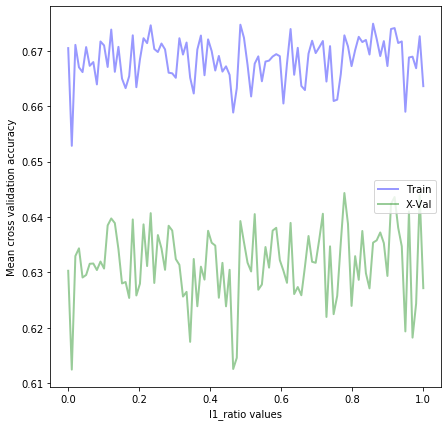

In [43]:
sgdreg = SGDRegressor(penalty='elasticnet')
l1_ratio = np.linspace(0, 1, 100)

train_scores, test_scores = calc_params(X_train_sgd, y_train, sgdreg, l1_ratio, 'l1_ratio', 5)

In [44]:
best_l1 = l1_ratio[np.argmax(test_scores)]
best_l1

0.7777777777777778

Using the best mixing ratio, apply the Elastic Net model to the set-aside test data.

In [45]:
sgdreg = SGDRegressor(penalty="elasticnet", l1_ratio=best_l1)
sgdreg.fit(X_train_sgd,y_train)

scaler.fit(X_test)
X_test_sgd = scaler.transform(X_test)

# Compute RMSE on testing data
p = sgdreg.predict(X_test_sgd)
err = p-y_test
total_error = np.dot(err,err)
rmse_test = np.sqrt(total_error/len(p))
print("SGD RMSE mean test:",np.mean(rmse_test))

SGD RMSE mean test: 0.13632958960942454


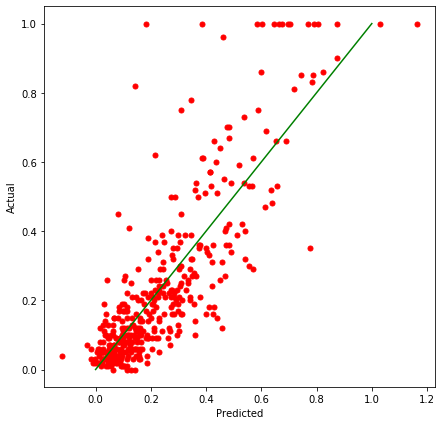

In [46]:
pl.plot(p, y_test,'ro', markersize=5)
pl.plot([0,1],[0,1], 'g-')
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.show()

Provide a brief summary of your findings from the above experiments.

There are quite a few hyperparameters available for tuning in SGD: alpha, penalty, iterations, learning rate, etc. Still, in this particular instance (on this particular dataset), my numbers were pretty similar for the various parameters experiemented with via SGD. Those results (RMSEs) were also in the same range as the other models as well.

__2.  Automatic Document Clustering [Dataset: newsgroups5.zip]__

For this problem you will use a different subset of the 20 Newsgroup data set that you used in Assignment 2  (see the description of the full dataset). 

The subset for this assignment includes 2,500 documents (newsgroup posts), each belonging to one of 5 categories windows (0), crypt (1), christian (2), hockey (3), forsale (4). 

The documents are represented by 9328 terms (stems). 

The dictionary (vocabulary) for the data set is given in the file "terms.txt" and the full term-by-document matrix is given in "matrix.txt" (comma separated values). 

The actual category labels for the documents are provided in the file "classes.txt". 

Your goal in this assignment is to perform clustering on the documents and compare the clusters to the actual categories.

[Note: for the clustering part of this assignment you should use the kMeans module form Ch. 10 of MLA (use the version provided here as it includes some corrections to the book version). You may also use Pandas and other modules from scikit-learn that you may need for preprocessing or evaluation.]

Your tasks in this problem are the following:

In [47]:
DATA_PATH = "/Users/claytoncohn/Dropbox/New/DePaul/DSC478/data/newsgroups5/"

a. Create your own distance function that, instead of using Euclidean distance, uses Cosine similarity. This is the distance function you will use to pass to the kMeans function.

In [48]:
# Code taken from course materials
def cos_sim(x, D):
    # first find the vector norm for each instance in D as wel as the norm for vector x
    x_norm = np.linalg.norm(x)
    D_norm = np.linalg.norm(D)

    # Compute Cosine: divide the dot product o x and each instance in D by the product of the two norms
    sims = np.dot(x,D)/(x_norm * D_norm)
        
    # The distance measure will be the inverse of Cosine similarity
    dists = 1 - sims
    
    return dists

b. Load the data set [Note: the data matrix provided has terms as rows and documents as columns. Since you will be clustering documents, you'll need to take the transpose of this matrix so that your main data matrix is a document x term matrix. In Numpy, you may use the ".T" operation to obtain the transpose.] 

In [49]:
X = pd.DataFrame(np.genfromtxt(DATA_PATH + "matrix.txt", delimiter=',',dtype=int))
X = X.T
X.shape

(2500, 9328)

In [50]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,9318,9319,9320,9321,9322,9323,9324,9325,9326,9327
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
# Must import classes for use later
y = np.genfromtxt(DATA_PATH + 'classes.txt', delimiter=' ', dtype=int, skip_header=1, usecols=(1))
y[:5]

array([0, 1, 1, 1, 2])

Then, split the data set (the document x term matrix) and set aside 20% for later use (see below). Use the 80% segment for clustering in the next part. The 20% portion must be a random subset.

In [52]:
SEED = 33

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,9318,9319,9320,9321,9322,9323,9324,9325,9326,9327
1289,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1935,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


c. Perform Kmeans clustering on the training data. 

In [53]:
# Code taken from MLA book (next 3 functions)
def distEclud(vecA, vecB):
    return sqrt(sum(power(vecA - vecB, 2))) #la.norm(vecA-vecB)

In [54]:
from numpy import *

def randCent(dataSet, k):
    n = shape(dataSet)[1]
    centroids = mat(zeros((k,n)))#create centroid mat
    for j in range(n):#create random cluster centers, within bounds of each dimension
        minJ = min(dataSet[:,j]) 
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = mat(minJ + rangeJ * random.rand(k,1))
    return centroids

In [55]:
# Code taken from MLA book
def kMeans(dataSet, k, distMeas=distEclud, createCent=randCent):
    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m,2)))#create mat to assign data points 
                                      #to a centroid, also holds SE of each point
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):#for each data point assign it to the closest centroid
            minDist = inf; minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2
        # print(centroids) # omitted for brevity
        for cent in range(k):#recalculate centroids
            num_pts_in_cluster = dataSet[nonzero(clusterAssment[:,0]==cent)[0]] # This needed editing from the original
            if(len(num_pts_in_cluster)!=0):
                centroids[cent,:] = mean(num_pts_in_cluster, axis=0) 
    return centroids, clusterAssment

In [73]:
X_train_np = X_train.to_numpy()
centroids, clusters = kMeans(X_train_np, 5, cos_sim, randCent)

matrix([[3.        , 0.78263577],
        [3.        , 0.74107434],
        [3.        , 0.71574537],
        ...,
        [0.        , 0.17351936],
        [3.        , 0.46781614],
        [3.        , 0.54136032]])

In [74]:
clusters[:10]

matrix([[3.        , 0.78263577],
        [3.        , 0.74107434],
        [3.        , 0.71574537],
        [3.        , 0.73457766],
        [3.        , 0.62992605],
        [3.        , 0.64404856],
        [3.        , 0.43359731],
        [0.        , 0.5310078 ],
        [3.        , 0.76304694],
        [3.        , 0.58403807]])

Write a function to display the top N terms in each cluster along with the cluster DF values for each term and the size of the cluster. 

The cluster DF value for a term t in a cluster C is the percentage of docs in cluster C in which term t appears (so, if a cluster has 500 documents, and term "game" appears in 100 of those 500 documents, then DF value of "game" in that cluster is 0.2 or 20%). 

Sort the terms for each cluster in decreasing order of the DF percentage. 

Here is an example of how this output might look like (here the top 10 terms for 3 of the 5 clusters are displayed in decreasing order of cluster DF values, but the mean frequnecy from the cluster centroid is also shown). 

In [57]:
# Must import the terms
terms = pd.read_table(DATA_PATH + 'terms.txt', sep='\n', header=None)
terms.head()

,0
0,aa
1,aargh
2,aaron
3,aaronc
4,ab


In [58]:
# Will use this for word cloud
clusters_by_term = []

def get_top_terms(clusters, centroids, terms, n_top, n_clusters):
    
    # Convert clusters and centroids
    terms_pnds = pd.Series(terms[0], name='term')
    clusters_pnds = pd.DataFrame(clusters)
    clusters_pnds.columns = ['cluster', 'error']
    results = {}
    
    # For each cluster
    for i in range(n_clusters):
        
        # Get indexes of items in this cluster
        cluster_ind = np.array(clusters_pnds.index[clusters_pnds.iloc[:,0] == i])
        
        # Convert the centroid from nparray to Pandas
        centroid = centroids[i]
        centroid = pd.Series(np.array(centroid).ravel(), name='value')
        
        # Match each term with its centroid
        term_cent = pd.concat([terms_pnds, centroid], axis=1)
        
        # Separate the cluster
        cluster = term_cent.iloc[cluster_ind]
        
        # Count documents in cluster
        num_docs_in_clust = len(cluster_ind)
        
        # Add all terms to clusters_by_term
        
        c_dict = {"cluster" : i,
                  "n" : num_docs_in_clust,
                  "terms" : cluster.sort_values(by='value', axis=0, ascending=False, inplace=False) }
        clusters_by_term.append(c_dict)
                
        # Sort and take the n_top of the head
        top = cluster.sort_values(by='value', axis=0, ascending=False, inplace=False).head(n_top)

        # Iterate through each top_n word, in each cluster
        word = []
        words = []
        
        for t in top.itertuples():
            word.append(t.term)
            word.append(round(t.value * num_docs_in_clust,2))
            word.append(round(t.value * 100,2))
            words.append(word)
            word = []
            
        results.update({i:(num_docs_in_clust, words)})
        
        words = []
        
    # Return dictionary = { cluster : number of documents, [[term, freq, % documents],...] }
    return results
    
top_terms_per_cluster = get_top_terms(clusters, centroids, terms, 10, 5)
top_terms_per_cluster

{0: (401,
  [['cup', 136.0, 33.92],
   ['bruin', 90.0, 22.44],
   ['boston', 89.0, 22.19],
   ['coach', 76.0, 18.95],
   ['dai', 48.0, 11.97],
   ['david', 48.0, 11.97],
   ['contact', 46.0, 11.47],
   ['beat', 39.0, 9.73],
   ['current', 37.0, 9.23],
   ['cours', 36.0, 8.98]]),
 1: (2, [['annual', 0.0, 0.0], ['commision', 0.0, 0.0]]),
 2: (6,
  [['ashton', 0.0, 0.0],
   ['atlanta', 0.0, 0.0],
   ['bo', 0.0, 0.0],
   ['broken', 0.0, 0.0],
   ['cypherpunk', 0.0, 0.0],
   ['dcsedacuk', 0.0, 0.0]]),
 3: (1584,
  [['articl', 714.0, 45.08],
   ['christian', 599.0, 37.82],
   ['chip', 439.0, 27.71],
   ['believ', 420.0, 26.52],
   ['clipper', 374.0, 23.61],
   ['church', 370.0, 23.36],
   ['comput', 365.0, 23.04],
   ['call', 357.0, 22.54],
   ['ask', 320.0, 20.2],
   ['card', 279.0, 17.61]]),
 4: (7,
  [['avail', 2.0, 28.57],
   ['archiv', 1.0, 14.29],
   ['american', 0.0, 0.0],
   ['backup', 0.0, 0.0],
   ['boil', 0.0, 0.0],
   ['butt', 0.0, 0.0],
   ['combin', 0.0, 0.0]])}

In [59]:
# Now display information about top terms
for key in top_terms_per_cluster:
    num, words = top_terms_per_cluster[key][0], top_terms_per_cluster[key][1]
    print("Cluster {0}, {1} documents:\n".format(key, num))
    print("Term\t\tTerm Freq\t% Documents\n")
    for w in words:
        t, f, d = w[0],w[1],w[2]
        print("{0}\t\t{1}\t\t{2}".format(t,f,d))
    print("\n")

Cluster 0, 401 documents:

Term		Term Freq	% Documents

cup		136.0		33.92
bruin		90.0		22.44
boston		89.0		22.19
coach		76.0		18.95
dai		48.0		11.97
david		48.0		11.97
contact		46.0		11.47
beat		39.0		9.73
current		37.0		9.23
cours		36.0		8.98


Cluster 1, 2 documents:

Term		Term Freq	% Documents

annual		0.0		0.0
commision		0.0		0.0


Cluster 2, 6 documents:

Term		Term Freq	% Documents

ashton		0.0		0.0
atlanta		0.0		0.0
bo		0.0		0.0
broken		0.0		0.0
cypherpunk		0.0		0.0
dcsedacuk		0.0		0.0


Cluster 3, 1584 documents:

Term		Term Freq	% Documents

articl		714.0		45.08
christian		599.0		37.82
chip		439.0		27.71
believ		420.0		26.52
clipper		374.0		23.61
church		370.0		23.36
comput		365.0		23.04
call		357.0		22.54
ask		320.0		20.2
card		279.0		17.61


Cluster 4, 7 documents:

Term		Term Freq	% Documents

avail		2.0		28.57
archiv		1.0		14.29
american		0.0		0.0
backup		0.0		0.0
boil		0.0		0.0
butt		0.0		0.0
combin		0.0		0.0




[Extra Credit: use your favorite third party tool or library, ideally with a Python based API, to create a word cloud for each cluster.]

In [60]:
# First we will convert the text from the terms
def make_text(n, t_mat):
    text = []
    
    if n == 0:
        c = clusters_by_term[2]
        n, t_mat =  int(c["n"]), c["terms"]
    
    terms, values = t_mat["term"].to_numpy(), t_mat["value"].to_numpy()

    for i in range(len(terms)):
        if values[i] == 0: 
            text.append(terms[i])
        else: 
            appearances = int(values[i] * n)
            for j in range(appearances):
                text.append(terms[i])
    return " ".join(text)

In [61]:
!pip install wordcloud

In [62]:
# Using code from https://medium.com/@dudsdu/an-example-of-word-cloud-with-mask-4cbbd699fb14
from os import path, getcwd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator

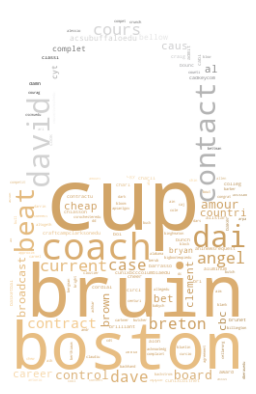

In [63]:
mask = np.array(Image.open(DATA_PATH + "padlock.png"))
c = clusters_by_term[0]
text = make_text(int(c["n"]), c["terms"])

wc = WordCloud(background_color="white", mask=mask, max_font_size=90, random_state=42, collocations=False)
wc.generate(text)

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

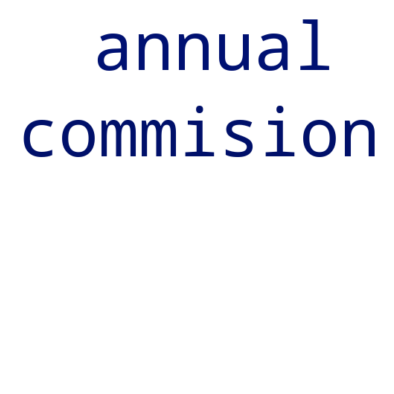

In [64]:
mask = np.array(Image.open(DATA_PATH + "windows.png"))
c = clusters_by_term[1]
text = make_text(int(c["n"]), c["terms"])

wc = WordCloud(background_color="white", mask=mask, max_font_size=90, random_state=42, collocations=False)
wc.generate(text)

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

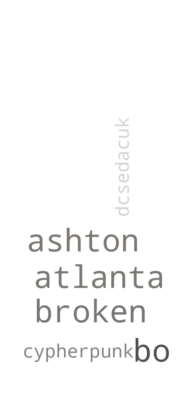

In [65]:
mask = np.array(Image.open(DATA_PATH + "cup.jpg"))
c = clusters_by_term[2]
text = make_text(int(c["n"]), c["terms"])

wc = WordCloud(background_color="white", mask=mask, max_font_size=90, random_state=42, collocations=False)
wc.generate(text)

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

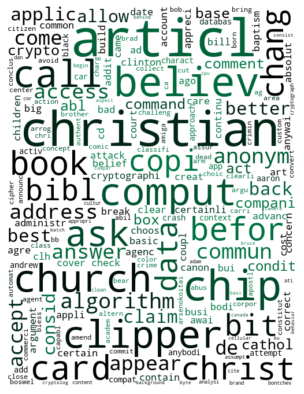

In [66]:
mask = np.array(Image.open(DATA_PATH + "forsale.png"))
c = clusters_by_term[3]
text = make_text(int(c["n"]), c["terms"])

wc = WordCloud(background_color="white", mask=mask, max_font_size=90, random_state=42, collocations=False)
wc.generate(text)

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

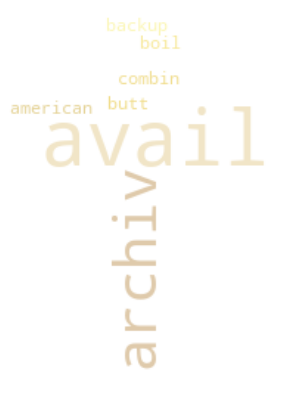

In [67]:
mask = np.array(Image.open(DATA_PATH + "cross.jpeg"))
c = clusters_by_term[4]
text = make_text(int(c["n"]), c["terms"])

wc = WordCloud(background_color="white", mask=mask, max_font_size=90, random_state=42, collocations=False)
wc.generate(text)

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

The WordCloud images were in general pretty cool. Some of them came out better than others depending on the frequency of documents in the cluster.

d. Using the cluster assignments from Kmeans clustering, compare your 5 clusters to the 5 pre-assigned classes by computing the Completeness and Homogeneity values.

In [68]:
# Code from class materials
from sklearn.metrics import completeness_score, homogeneity_score
print("Completeness:",completeness_score(y_train,np.ravel(clusters.T[0])))
print("Homogeneity:",homogeneity_score(y_train,np.ravel(clusters.T[0])))

Completeness: 0.7463523666200558
Homogeneity: 0.2555521934573923


e. Finally, using your cluster assignments as class labels, categorize each of the documents in the 20% set-aside data into each of the appropriate cluster. 

Your categorization should be based on Cosine similarity between each test document and cluster centroids. 

In [69]:
X_test_np = X_test.to_numpy()
X_test[:5]

,0,1,2,3,4,5,6,7,8,9,...,9318,9319,9320,9321,9322,9323,9324,9325,9326,9327
1590,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
277,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2297,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1739,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
511,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
cos_sim_mat = 1 - cos_sim(X_test_np,centroids.T)
cos_sim_mat

matrix([[1.04847596e-07, 3.06015625e-07, 3.54800724e-08, 1.42155480e-07,
         8.74330357e-08],
        [6.87017188e-07, 3.08676630e-06, 7.98301630e-08, 1.16791932e-06,
         7.33677212e-07],
        [8.87886601e-08, 4.25760869e-07, 4.43500906e-08, 1.07817758e-07,
         5.24598214e-07],
        ...,
        [8.20863770e-08, 2.92710598e-07, 3.10450634e-08, 1.38980416e-07,
         1.36851708e-07],
        [3.28810023e-07, 7.18471467e-07, 8.87001811e-08, 4.19763527e-07,
         3.38327834e-07],
        [3.51040368e-08, 1.72965353e-07, 5.32201087e-08, 3.91423147e-08,
         4.18157997e-08]])

For each test document show the predicted class label as well as Cosine similarity to the corresponding cluster.

In [71]:
# for each row in the matrix, isolate the index and the value for the highest similarity
preds_dict = {}
for i in range(len(cos_sim_mat)):
    m = np.argmax(cos_sim_mat[i])
    preds_dict.update({i:(m,ravel(cos_sim_mat[i])[m])})
    print("Cluster predicted: {}, Cosine Similarity: {}".format(preds_dict[i][0], preds_dict[i][1]))

Cluster predicted: 1, Cosine Similarity: 3.060156247292056e-07
Cluster predicted: 1, Cosine Similarity: 3.0867663020073266e-06
Cluster predicted: 4, Cosine Similarity: 5.245982138690763e-07
Cluster predicted: 1, Cosine Similarity: 6.785563853028975e-07
Cluster predicted: 0, Cosine Similarity: 2.0783713250427382e-07
Cluster predicted: 1, Cosine Similarity: 1.6232133139837401e-06
Cluster predicted: 1, Cosine Similarity: 9.180468742986392e-07
Cluster predicted: 1, Cosine Similarity: 6.519463310317164e-07
Cluster predicted: 1, Cosine Similarity: 4.576929344302094e-06
Cluster predicted: 3, Cosine Similarity: 2.0142332790573647e-07
Cluster predicted: 1, Cosine Similarity: 8.914368199164358e-07
Cluster predicted: 4, Cosine Similarity: 1.0644021730676911e-07
Cluster predicted: 1, Cosine Similarity: 3.592357333825902e-07
Cluster predicted: 2, Cosine Similarity: 1.6941734588549195e-06
Cluster predicted: 4, Cosine Similarity: 7.222729037081876e-08
Cluster predicted: 1, Cosine Similarity: 4.390658

In [72]:
y_test_pred = [np.argmax(cos_sim_mat[i]) for i in range(len(cos_sim_mat))]
y_test_pred = np.array(y_test_pred)

clus0 = len(np.where(y_test_pred == 0)[0])
clus1 = len(np.where(y_test_pred == 1)[0])
clus2 = len(np.where(y_test_pred == 2)[0])
clus3 = len(np.where(y_test_pred == 3)[0])
clus4 = len(np.where(y_test_pred == 4)[0])

print("Predicted cluster 0:",clus0)
print("Predicted cluster 1:",clus1)
print("Predicted cluster 2:",clus2)
print("Predicted cluster 3:",clus3)
print("Predicted cluster 4:",clus4)

Predicted cluster 0: 45
Predicted cluster 1: 327
Predicted cluster 2: 9
Predicted cluster 3: 51
Predicted cluster 4: 68
